## Introduction
Outliers are the point most distant to the regression line. Their location can bedetected by plotting a visual representation and by performing certain calculations like standarddeviation. Outlier’s distance from the regression line is calculated as follows: $\left | y-\widehat{y} \right |> 2 \sqrt{\frac{SSE}{n-2}}$, where n is the number of data points, SSE is the sum of squared errors, y is the true value and y hat is the prediction.This facilitates its detection. For example, in a  2-dimensionalspace, a point P will be considered an outlier if it is not between D-2s and D+2s, where Dis the regression line and $\ s = \sqrt{\frac{SSE}{n-2}}$. We use this characteristic of an outlier as a basis to initiate the function with the input values quantity outliers and number of generated points.

## Content:
- [Part 1](#part1)-  Generating Data
- [Part 2](#part2)- Simple Regression
- [Part 3](#part3) -  Effect of adding one outlier
- [Part 4](#part4) -  Detection of outliers
- [Part 5](#part5) -  Metrics for defining an outlier
- [Part 6](#part6) -  Impact of number of outliers on the Regression
- [Part 7](#part7) -  Implementing knowledge of outliers on the mpg dataset
- [Part 8](#part8) -  Conclusion

In [1]:
import numpy as np
import math
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from abc import ABC, abstractmethod
from numpy.random import default_rng
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [2]:
rng = default_rng(seed=0)

[Back to top](#Content:)


<a id='part1'></a>

# Part 1 -  Generating  Data

In [3]:
## Generate data points with a class
class Data2D:
    
    def __init__(self, slope = (1, 1), noise_variance = 1 ):
        
        # intialize member variables here 
        self.slope = slope
        self.noise_variance = noise_variance
        
        
        
    def generate_points(self, N = 50):
    
        slope = self.slope
        noise_variance = self.noise_variance

        # initialize noise epsilon 
        epsilon = rng.normal(0, noise_variance**(1/2), N)

        ## Generate N points

        # Adding the X_0 coordinates full of ones for vector multiplications
        X_0 = np.ones(N)
        # for X_1 generate random points between -15,15
        X_1 = 30*(np.random.random(N)-0.5)

        # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
        X = np.vstack( [X_0, X_1]).transpose()

        # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
        # line parameters (a,b, c) are stored in a local variable

        y = X.dot(np.array(slope)) + epsilon

        return X, y

In [4]:
## Function to generate data with noise
def generate_data(slope = (1,1), noise_variance=1, N = 50):
    
    # initialize noise epsilon 
    epsilon = rng.normal(0, noise_variance**(1/2), N)
    
    ## Generate N points
    
    # Adding the X_0 coordinates full of ones for vector multiplications
    X_0 = np.ones(N)
    # for X_1 generate random points between -15,15
    X_1 = 30*(np.random.random(N)-0.5)
    
    # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
    X = np.vstack( [X_0, X_1]).transpose()
    
    # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
    # line parameters (a,b, c) are stored in a local variable

    y = X.dot(np.array(slope)) + epsilon
    
    return X, y

[Back to top](#Content:)


<a id='part2'></a>

# Part 2 -  Simple Regression


In [5]:
# Function that returns regression params
def regression(X, y) :
    reg = LinearRegression().fit(X.reshape(-1,1), y)
    
    return reg.coef_[0], reg.intercept_, reg.score(X, y)

    

Regression slope : 1.949 Regression intercept : -0.814 Regression score : 0.988


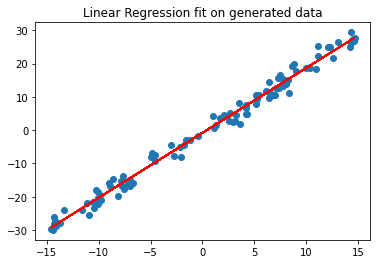

In [6]:
s = (-1,2)
X, y = generate_data(s, 4, 100)
ar, br, cr = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % ar, 'Regression intercept : %.3f' % br, 'Regression score : %.3f' % cr)
plt.plot(X[:,1],ar*X[:,1]+br, c='red')
plt.scatter(X[:,1],y)
plt.title('Linear Regression fit on generated data')
plt.show();

[Back to top](#Content:)


<a id='part3'></a>

# Part 3 -  Effect of adding one outlier 


In [7]:
## Adding one outlier
outlier = (20,0)
Xo = np.append(X[:,1],outlier[0])
yo = np.append(y,outlier[1])

Regression slope : 1.856 Regression intercept : -1.130 Regression score : 0.940


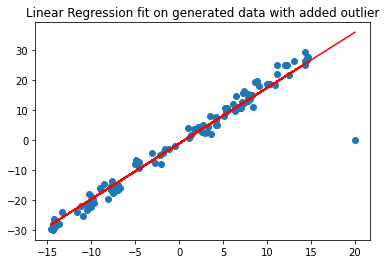

In [8]:
a, b, c = regression(Xo.reshape(-1,1), yo)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red')
plt.scatter(Xo,yo)
plt.title('Linear Regression fit on generated data with added outlier')

plt.show();

Regression slope : 1.949 Outlier Reg slope : 1.610
Regression intercept : -0.814 Outlier Reg intercept : -0.147
Regression score : 0.988 Outlier Reg score : 0.872
The outlier distance from the green line is : 31.75
The outlier distance from the red line is : 26.72


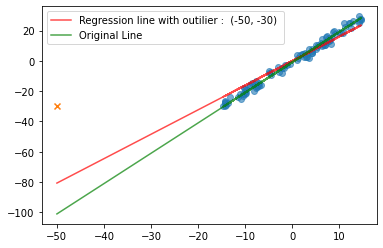

Regression slope : 1.949 Outlier Reg slope : 1.674
Regression intercept : -0.814 Outlier Reg intercept : -0.228
Regression score : 0.988 Outlier Reg score : 0.899
The outlier distance from the green line is : 27.28
The outlier distance from the red line is : 23.37


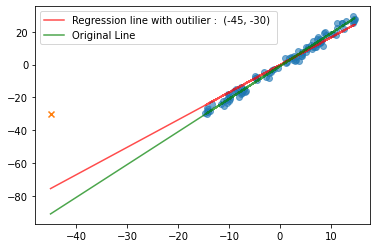

Regression slope : 1.949 Outlier Reg slope : 1.736
Regression intercept : -0.814 Outlier Reg intercept : -0.316
Regression score : 0.988 Outlier Reg score : 0.923
The outlier distance from the green line is : 22.81
The outlier distance from the red line is : 19.84


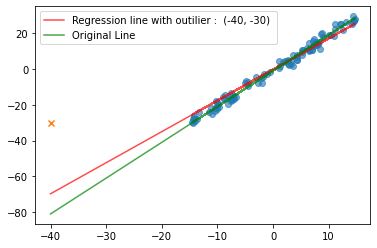

Regression slope : 1.949 Outlier Reg slope : 1.793
Regression intercept : -0.814 Outlier Reg intercept : -0.409
Regression score : 0.988 Outlier Reg score : 0.945
The outlier distance from the green line is : 18.34
The outlier distance from the red line is : 16.16


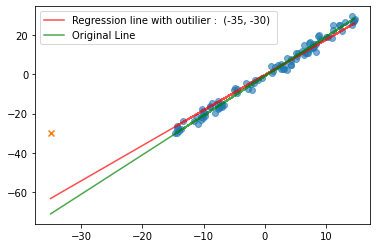

Regression slope : 1.949 Outlier Reg slope : 1.845
Regression intercept : -0.814 Outlier Reg intercept : -0.506
Regression score : 0.988 Outlier Reg score : 0.963
The outlier distance from the green line is : 13.86
The outlier distance from the red line is : 12.32


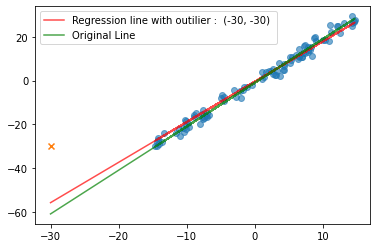

Regression slope : 1.949 Outlier Reg slope : 1.889
Regression intercept : -0.814 Outlier Reg intercept : -0.607
Regression score : 0.988 Outlier Reg score : 0.977
The outlier distance from the green line is : 9.39
The outlier distance from the red line is : 8.34


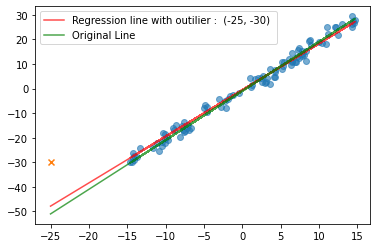

Regression slope : 1.949 Outlier Reg slope : 1.924
Regression intercept : -0.814 Outlier Reg intercept : -0.710
Regression score : 0.988 Outlier Reg score : 0.985
The outlier distance from the green line is : 4.92
The outlier distance from the red line is : 4.24


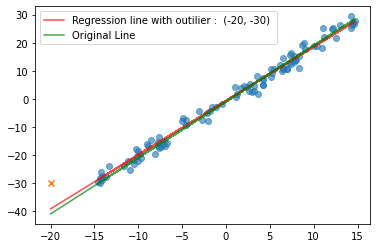

Regression slope : 1.949 Outlier Reg slope : 1.949
Regression intercept : -0.814 Outlier Reg intercept : -0.813
Regression score : 0.988 Outlier Reg score : 0.988
The outlier distance from the green line is : 0.45
The outlier distance from the red line is : 0.02


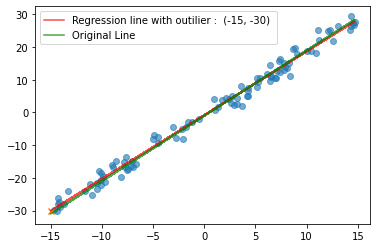

Regression slope : 1.949 Outlier Reg slope : 1.963
Regression intercept : -0.814 Outlier Reg intercept : -0.915
Regression score : 0.988 Outlier Reg score : 0.985
The outlier distance from the green line is : 4.02
The outlier distance from the red line is : 4.29


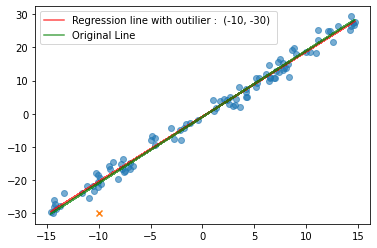

Regression slope : 1.949 Outlier Reg slope : 1.963
Regression intercept : -0.814 Outlier Reg intercept : -1.012
Regression score : 0.988 Outlier Reg score : 0.976
The outlier distance from the green line is : 8.50
The outlier distance from the red line is : 8.70


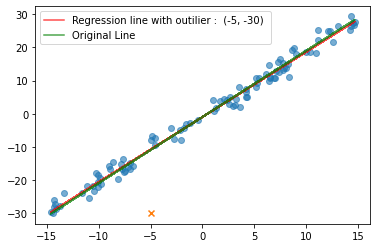

Regression slope : 1.949 Outlier Reg slope : 1.951
Regression intercept : -0.814 Outlier Reg intercept : -1.104
Regression score : 0.988 Outlier Reg score : 0.960
The outlier distance from the green line is : 12.97
The outlier distance from the red line is : 13.18


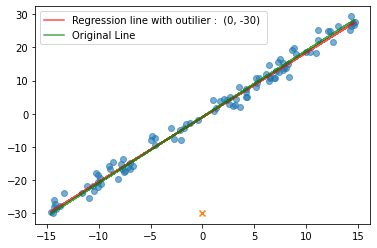

Regression slope : 1.949 Outlier Reg slope : 1.926
Regression intercept : -0.814 Outlier Reg intercept : -1.187
Regression score : 0.988 Outlier Reg score : 0.938
The outlier distance from the green line is : 17.44
The outlier distance from the red line is : 17.71


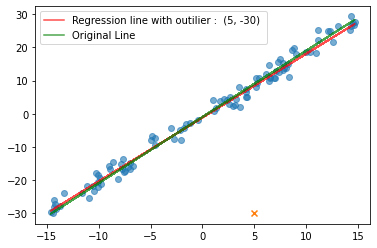

Regression slope : 1.949 Outlier Reg slope : 1.889
Regression intercept : -0.814 Outlier Reg intercept : -1.262
Regression score : 0.988 Outlier Reg score : 0.911
The outlier distance from the green line is : 21.91
The outlier distance from the red line is : 22.28


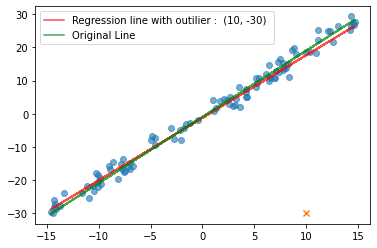

Regression slope : 1.949 Outlier Reg slope : 1.841
Regression intercept : -0.814 Outlier Reg intercept : -1.326
Regression score : 0.988 Outlier Reg score : 0.878
The outlier distance from the green line is : 26.39
The outlier distance from the red line is : 26.87


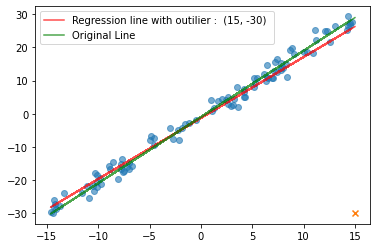

Regression slope : 1.949 Outlier Reg slope : 1.783
Regression intercept : -0.814 Outlier Reg intercept : -1.378
Regression score : 0.988 Outlier Reg score : 0.842
The outlier distance from the green line is : 30.86
The outlier distance from the red line is : 31.45


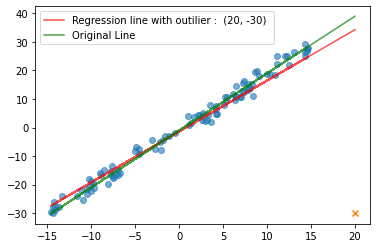

Regression slope : 1.949 Outlier Reg slope : 1.717
Regression intercept : -0.814 Outlier Reg intercept : -1.419
Regression score : 0.988 Outlier Reg score : 0.802
The outlier distance from the green line is : 35.33
The outlier distance from the red line is : 35.99


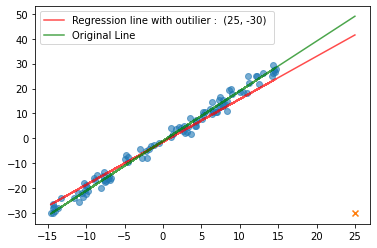

Regression slope : 1.949 Outlier Reg slope : 1.644
Regression intercept : -0.814 Outlier Reg intercept : -1.449
Regression score : 0.988 Outlier Reg score : 0.760
The outlier distance from the green line is : 39.80
The outlier distance from the red line is : 40.47


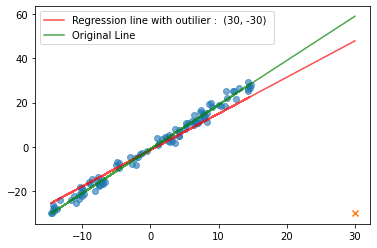

Regression slope : 1.949 Outlier Reg slope : 1.567
Regression intercept : -0.814 Outlier Reg intercept : -1.467
Regression score : 0.988 Outlier Reg score : 0.716
The outlier distance from the green line is : 44.27
The outlier distance from the red line is : 44.85


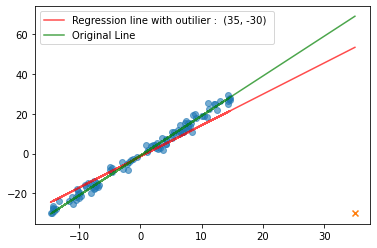

Regression slope : 1.949 Outlier Reg slope : 1.487
Regression intercept : -0.814 Outlier Reg intercept : -1.476
Regression score : 0.988 Outlier Reg score : 0.672
The outlier distance from the green line is : 48.75
The outlier distance from the red line is : 49.11


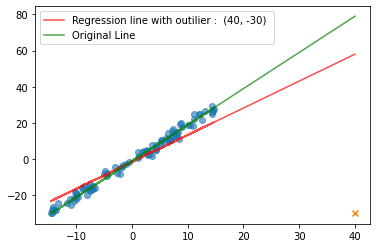

Regression slope : 1.949 Outlier Reg slope : 1.407
Regression intercept : -0.814 Outlier Reg intercept : -1.476
Regression score : 0.988 Outlier Reg score : 0.629
The outlier distance from the green line is : 53.22
The outlier distance from the red line is : 53.20


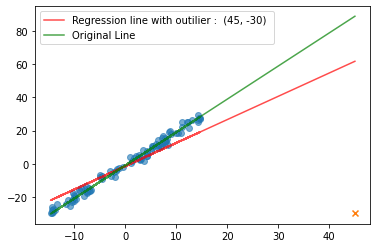

In [9]:
## Studying the impact of adding one outlier on randomly generated data with one outlier
## Each time we change the outlier and see what happens
slopes = []
intercepts = []
reg_score = []
distances = []
for i in range(100):
    outlier = (-50+i, -30)
    Xo = np.append(X[:,1],outlier[0])
    yo = np.append(y,outlier[1])
    slope, intercept, score = regression(Xo.reshape(-1,1), yo)
    slopes.append(slope)
    intercepts.append(intercept)
    reg_score.append(score)
    a = s[1]
    b = s[0]
    distance = np.absolute((a*outlier[0]+b-outlier[1])/(np.sqrt(a**2+1)))
    distance_reg = np.absolute((slope*outlier[0]+intercept-outlier[1])/(np.sqrt(slope**2+1)))
    distances.append(distance)
    if i%5 == 0 :
        print('Regression slope : %.3f' % ar,'Outlier Reg slope : %.3f' % slope)  
        print('Regression intercept : %.3f' % br,'Outlier Reg intercept : %.3f' % intercept)
        print('Regression score : %.3f' % cr,'Outlier Reg score : %.3f' % score)
        print('The outlier distance from the green line is : %.2f' % distance)
        print('The outlier distance from the red line is : %.2f' % distance_reg)
        z = np.ones(len(y)+1)
        z[len(y)] = 0
        plt.plot(Xo,slope*Xo+intercept, c='red', label = f'Regression line with outilier :  {outlier} ', alpha = 0.7)
        plt.plot(Xo,a*Xo+b, c='green', label = f'Original Line', alpha = 0.7)
        plt.scatter(Xo[:len(y)],yo[:len(y)], marker = 'o', cmap='Spectral', alpha = 0.6 )
        plt.scatter(Xo[len(y)],yo[len(y)], marker = 'x', cmap='summer')
        plt.legend(loc = 'upper left')
        plt.show();
    
    
    

### Conclusion


The outlier pulls the line towards it. The further the outlier is from the line the stronger the pull, and the strong it's effect on the regression score.

[Back to top](#Content:)


<a id='part4'></a>

# Part 4 - Detection of outliers
Outliers are the points most distant to the line, let's look at an example

### Generating Data

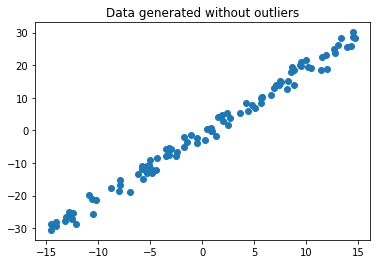

In [10]:
## Lets generate some points

data = Data2D(s, 3)
X, y = data.generate_points(100)
plt.scatter(X[:,1],y)
plt.title('Data generated without outliers')
plt.show();

### Adding outliers

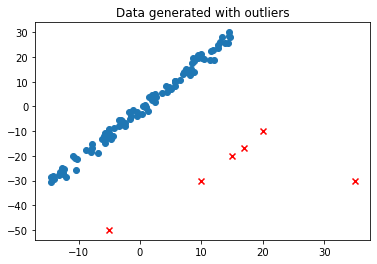

In [11]:
## Adding 6 outliers
outliers = [(20,-10), (35,-30), (17,-17), (10,-30), (-5, -50), (15,-20)]
x_outliers = np.array([outliers[i][0] for i in range(len(outliers))])
y_outliers = np.array([outliers[i][1] for i in range(len(outliers))])

Xo = np.concatenate((X[:,1],x_outliers), axis=0)
yo = np.concatenate((y,y_outliers), axis=0)

plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Data generated with outliers')
plt.show();


We fit a regression line on points with and without outliers and see the effect, here we choose intentionally to  add outliers on the right side of the regression line to see clearly the effect.

Regression slope : 2.003 Regression intercept : -1.089 Regression score : 0.991
Outliers Regression slope : 1.378 Outliers Regression intercept : -3.486 Outliers Regression score : 0.521


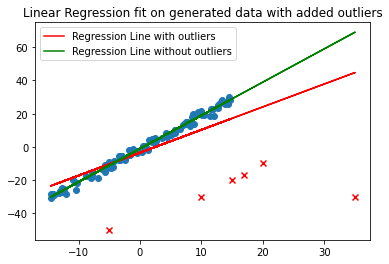

In [12]:
a, b, c = regression(Xo.reshape(-1,1), yo)
a1, b1, c1 = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a1, 'Regression intercept : %.3f' % b1, 'Regression score : %.3f' % c1)
print('Outliers Regression slope : %.3f' % a, 'Outliers Regression intercept : %.3f' % b, 'Outliers Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red', label='Regression Line with outliers')
plt.plot(Xo,a1*Xo+b1, c='green', label='Regression Line without outliers')
plt.legend(loc='upper left')
plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Linear Regression fit on generated data with added outliers')
plt.show();

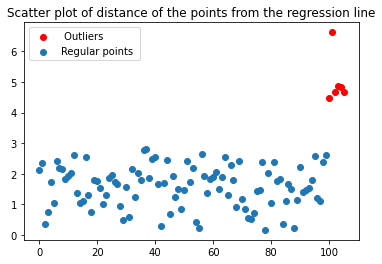

In [13]:
## Checking distance of the points from the fitted line
### We use the line fitted with outliers supposing that we havent removed them yet

distances = []
for i in range(len(yo)):
    distance = np.absolute((a*Xo[i]+b-yo[i])/(np.sqrt(a**2+1)))
    distances.append(distance)

norms = [np.sqrt(x) for x in distances]
points = np.arange(len(yo))
plt.scatter(points[-6:], norms[-6:], c='red', label=' Outliers ')
plt.scatter(points[:-6], norms[:-6], label = 'Regular points ')
plt.legend()
plt.title('Scatter plot of distance of the points from the regression line')
plt.show();

The scatter plot shows the distance different points from the regression line, the outliers are the points with the biggest distance.

[Back to top](#Content:)


<a id='part5'></a>

### Part 5 - Metrics for defining an outlier

We will say that a point is an outlier if it is located further than two standard deviations above or below the best-fit line  : 


<center> $\left | y-\widehat{y} \right |> 2 \sqrt{\frac{SSE}{n-2}}$ </center>

With $n$ number of data points and SSE is sum of squared errors.




Resources : (https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/12%3A_Linear_Regression_and_Correlation/12.07%3A_Outliers)

For the example before we compute $ s =  2 \sqrt{\frac{SSE}{n-2}}$ first.

Let's visualise the regression line fit along with the line limiting the boundary of outliers.

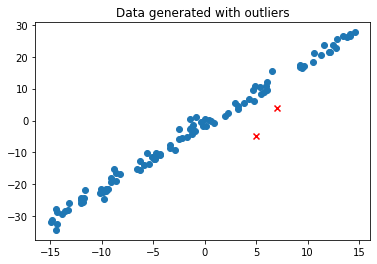

In [14]:
s = (-1,2)
X, y = generate_data(s, 2, 100)

## Adding one outlier
outliers = [(5,-5),(7,4)]
x_outliers = np.array([outliers[i][0] for i in range(len(outliers))])
y_outliers = np.array([outliers[i][1] for i in range(len(outliers))])
Xo = np.concatenate((X[:,1],x_outliers), axis=0)
yo = np.concatenate((y,y_outliers), axis=0)
plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Data generated with outliers')
plt.show();

Regression slope : 1.979 Regression intercept : -1.443 Regression score : 0.983


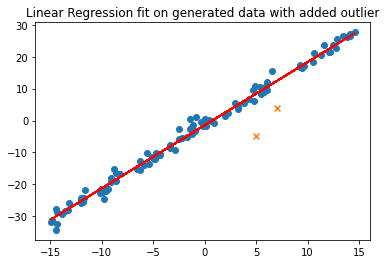

In [15]:
a, b, c = regression(Xo.reshape(-1,1), yo)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red')
plt.scatter(Xo[:-2],yo[:-2])
plt.scatter(Xo[-2:],yo[-2:], marker='x')
plt.title('Linear Regression fit on generated data with added outlier')
plt.show();

In [16]:
## Lets compute s

squared_errors = [(a*Xo[i]+b-yo[i])**2 for i in range(len(yo))]

sse = sum(squared_errors)

s = np.sqrt(sse/(len(yo)-2))

print('s : %.2f' % s)

s : 2.26


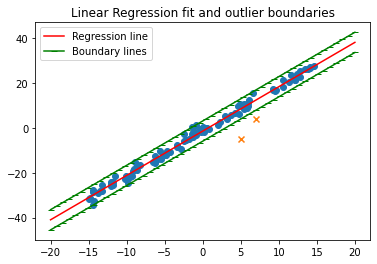

In [17]:
## Lets plot the decision boundary for outliers

x = np.linspace(-20,20,50)
plt.plot(x,a*x+b, c='red', label='Regression line')
plt.plot(x,a*x+b+2*s, c='green', label = 'Boundary lines' , marker="_")
plt.plot(x,a*x+b-2*s, c='green', marker="_" )
plt.scatter(Xo[:-2],yo[:-2])
plt.scatter(Xo[-2:],yo[-2:], marker='x')
plt.title('Linear Regression fit and outlier boundaries')
plt.legend()
plt.show();


We can also detect outliers by computing the residual errors. We compute the indices of the points that lies beyond the boundary.

In [18]:
indices = []

for i in range(len(yo)) :
    if np.absolute(a*Xo[i]+b-yo[i]) > 2*s :
        indices.append(i)
        
print(indices)

[19, 100, 101]


Manually added outliers indices are 100 and 101, while the point with index 19 lies on the limit of the decision boundary and is considered as an outlier solely as en effect of noise.

[Back to top](#Content:)


<a id='part6'></a>

# Part 6 - Impact of number of outliers on the Regression

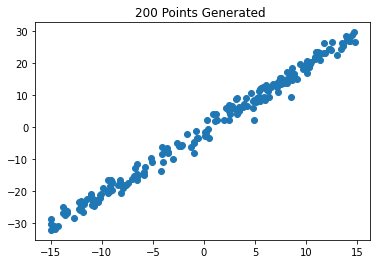

In [19]:
### Generating Data Points
s=(-1,2)
data = Data2D(s, 3)
X,y = data.generate_points(200)
title = '200 Points Generated '
plt.title(title)
plt.scatter(X[:,1],y);

Regression slope : 1.998 Regression intercept : -1.023 Regression score : 0.990
Original line slope : 2.000 Original line intercept : -1.000


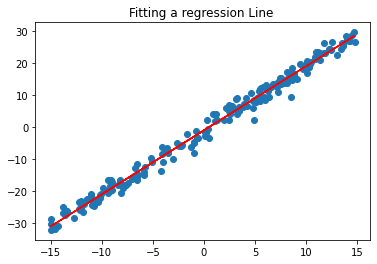

In [20]:
## Fitting the regression line and printig the parameters
a, b, c = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
print('Original line slope : %.3f' % s[1], 'Original line intercept : %.3f' % s[0])

plt.plot(X,a*X+b, c='red')
title = 'Fitting a regression Line '
plt.title(title)
plt.scatter(X[:,1],y)
plt.show();

Regression slope : 1.998 Regression intercept : -1.023 Regression score : 0.990


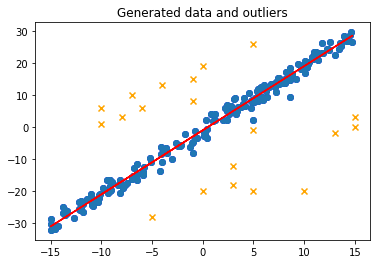

In [21]:
## Defining a list of 20 outlier
outliers = [(0,-20), (0,19), (5,-20), (5,26), (-5, -28), (10,-20),(15,0),(-10,6),(3,-18),(-6,6),(-1,8),(-7,10),(-1,15),(-10,1),(-4,13),(-8,3),(5,-1),(13,-2),(15,3),(3,-12)]
x_outliers = np.array([outliers[i][0] for i in range(len(outliers))])
y_outliers = np.array([outliers[i][1] for i in range(len(outliers))])
Xo = np.concatenate((X[:,1],x_outliers), axis=0)
yo = np.concatenate((y,y_outliers), axis=0)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)

plt.plot(X,a*X+b, c='red')
plt.scatter(X[:,1],y, c='blue')
plt.scatter(x_outliers,y_outliers, c='orange', marker='x')
plt.scatter(X[:,1],y)
title = 'Generated data and outliers'
plt.title(title)

plt.show();


After adding 1 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.999
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.117
Original Regression score : 0.990 , Outliers Regression score : 0.985


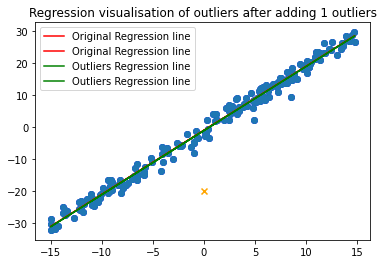

After adding 2 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.998
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.018
Original Regression score : 0.990 , Outliers Regression score : 0.978


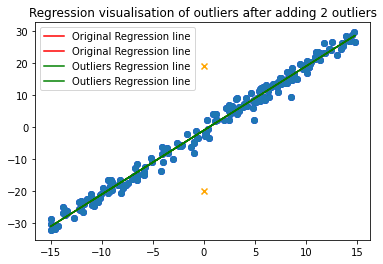

After adding 3 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.990
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.157
Original Regression score : 0.990 , Outliers Regression score : 0.965


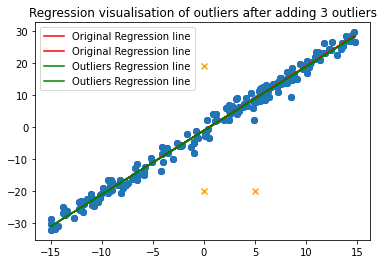

After adding 4 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.995
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.075
Original Regression score : 0.990 , Outliers Regression score : 0.961


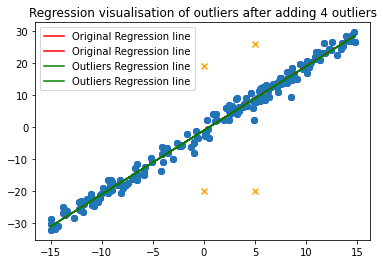

After adding 5 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 2.001
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.160
Original Regression score : 0.990 , Outliers Regression score : 0.957


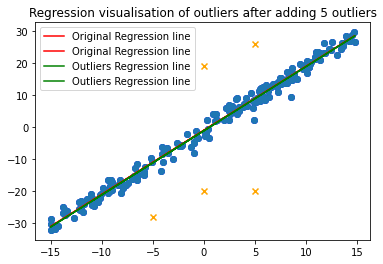

After adding 6 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.977
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.338
Original Regression score : 0.990 , Outliers Regression score : 0.935


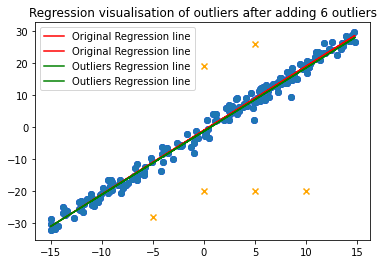

After adding 7 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.951
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.461
Original Regression score : 0.990 , Outliers Regression score : 0.923


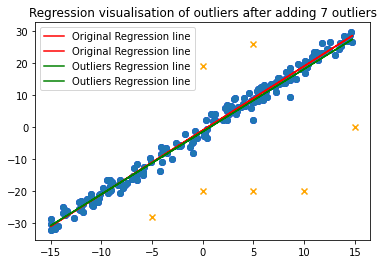

After adding 8 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.933
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.323
Original Regression score : 0.990 , Outliers Regression score : 0.912


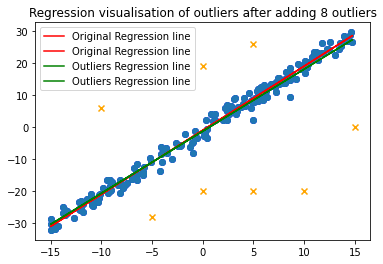

After adding 9 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.930
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.429
Original Regression score : 0.990 , Outliers Regression score : 0.904


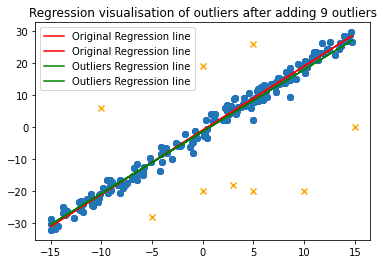

After adding 10 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.922
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.335
Original Regression score : 0.990 , Outliers Regression score : 0.899


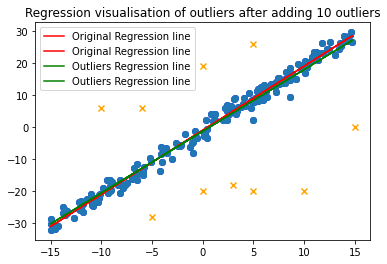

After adding 11 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.921
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.281
Original Regression score : 0.990 , Outliers Regression score : 0.897


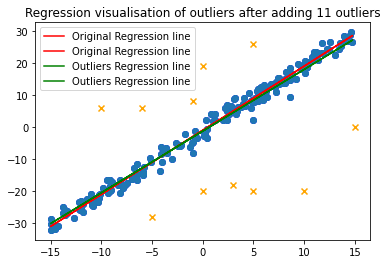

After adding 12 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.910
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.160
Original Regression score : 0.990 , Outliers Regression score : 0.888


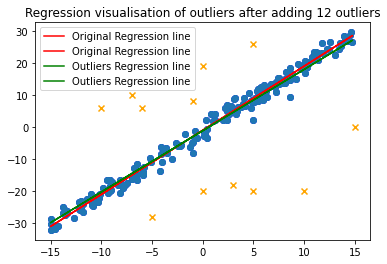

After adding 13 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.908
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.074
Original Regression score : 0.990 , Outliers Regression score : 0.884


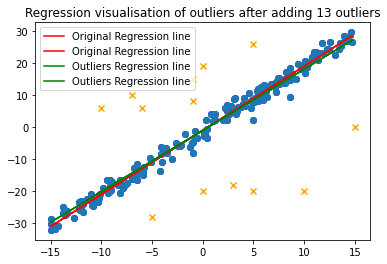

After adding 14 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.895
Original Regression intercept : -1.023 , Outliers Regression intercept : -0.971
Original Regression score : 0.990 , Outliers Regression score : 0.877


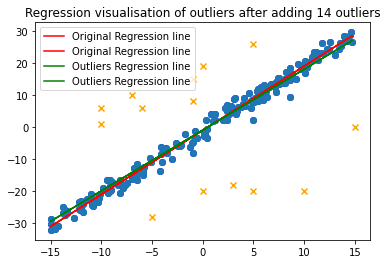

After adding 15 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.889
Original Regression intercept : -1.023 , Outliers Regression intercept : -0.868
Original Regression score : 0.990 , Outliers Regression score : 0.870


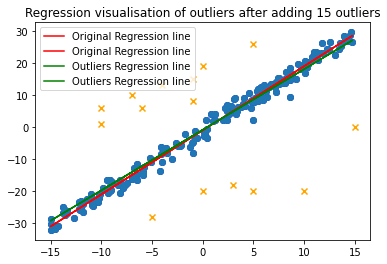

After adding 16 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.879
Original Regression intercept : -1.023 , Outliers Regression intercept : -0.778
Original Regression score : 0.990 , Outliers Regression score : 0.865


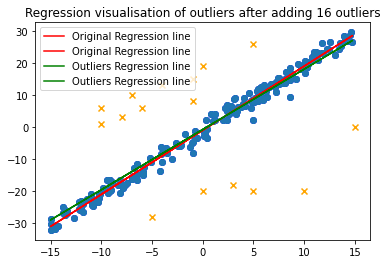

After adding 17 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.877
Original Regression intercept : -1.023 , Outliers Regression intercept : -0.821
Original Regression score : 0.990 , Outliers Regression score : 0.864


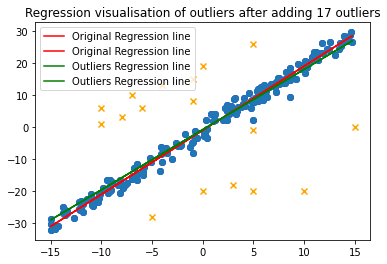

After adding 18 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.857
Original Regression intercept : -1.023 , Outliers Regression intercept : -0.931
Original Regression score : 0.990 , Outliers Regression score : 0.854


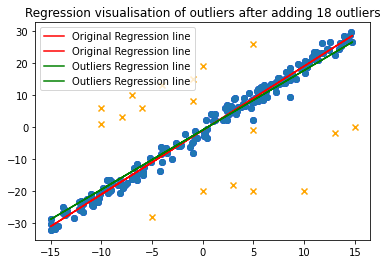

After adding 19 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.836
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.031
Original Regression score : 0.990 , Outliers Regression score : 0.846


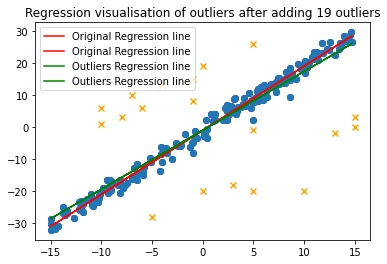

After adding 20 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 1.998 , Outliers Regression slope : 1.833
Original Regression intercept : -1.023 , Outliers Regression intercept : -1.105
Original Regression score : 0.990 , Outliers Regression score : 0.842


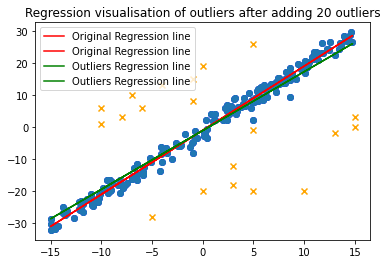

In [22]:
## We add each time one outlier and observe the effect
slopes = []
intercepts = []
scores = []

for i in range(1,len(outliers)+1):
    
    ## Adding i outlier
    x_outliers = np.array([outliers[j][0] for j in range(i)])
    y_outliers = np.array([outliers[j][1] for j in range(i)])
    Xo = np.concatenate((X[:,1],x_outliers), axis=0)
    yo = np.concatenate((y,y_outliers), axis=0)
    
    ## Fitting the regression line
    ao, bo, co = regression(Xo.reshape(-1,1), yo)
    print(f'After adding {i} outliers : ')
    print('Original line slope : %.3f' % s[1], ', Original line intercept : %.3f' % s[0])
    print('Original Regression slope : %.3f' % a, ', Outliers Regression slope : %.3f' % ao)
    print('Original Regression intercept : %.3f' % b, ', Outliers Regression intercept : %.3f' % bo)
    print('Original Regression score : %.3f' % c, ', Outliers Regression score : %.3f' % co)

    ## Appending the parameters to the lists
    slopes.append(ao)
    intercepts.append(bo)
    scores.append(co)
    
    ## Visualisation
    plt.scatter(X[:,1],y, c='blue')
    plt.scatter(x_outliers,y_outliers, c='orange', marker='x')
    plt.plot(X,a*X+b, c='red', label = 'Original Regression line')
    plt.plot(X,ao*X+bo, c='green', label = 'Outliers Regression line')
    plt.scatter(X[:,1],y)
    title = f'Regression visualisation of outliers after adding {i} outliers'
    plt.title(title)
    plt.legend()
    plt.show();  


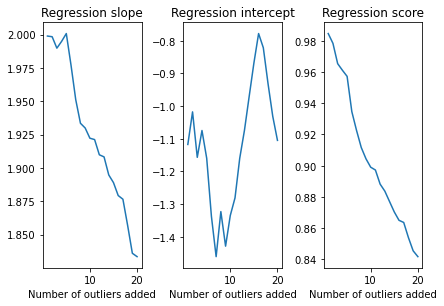

<Figure size 1600x1600 with 0 Axes>

In [23]:
# Visualisation of regression parameters
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.figure(figsize=(20, 20), dpi=80)
fig.tight_layout()


x = np.arange(20)+1

ax1.plot(x, slopes)
ax2.plot(x, intercepts)
ax3.plot(x, scores)

ax1.set_title('Regression slope')
ax2.set_title('Regression intercept')
ax3.set_title('Regression score')

ax1.set_xlabel('Number of outliers added')
ax2.set_xlabel('Number of outliers added')
ax3.set_xlabel('Number of outliers added')


plt.show();

[Back to top](#Content:)


<a id='part7'></a>

# Part 7 -  Implementing knowledge of outliers on the mpg dataset 



Further in our analysis, we have applied our knowledge on “auto-mpg” dataset. Outliers of selected features were detected using Z-score method (Z score =  (x-mean)/(st.deviation)), where the threshold was set to 2. This method has returned lists of values which are beyond the threshold and, as a consequence are outliers. We have mentioned that outliers were located close to the maximum value of the feature. To visualise outliers in a plot we have implemented matplot.lib “bloxplot” method, which graphically demonstrated the spread and their distance. To increase accuracy of prediction and eliminate any outliers from this dataset we have decided remove outlier-features from the dataset.

###  Detecting Outliers

In [24]:
#importing dataset and libraries
import os
import pandas as pd
import numpy as np
path = "."
filename = os.path.join("auto-mpg.csv")
df = pd.read_csv(filename)

In [25]:
#printing first 10 rows
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [26]:
#statistical overview of the dataset's features
new_df = df.copy()
new_df = new_df.select_dtypes(include=["int","float"])

headers = list(new_df.columns.values)
fields = []
for field in headers:
    fields.append({
        "name":field,
        "mean":df[field].mean(),
        "var":df[field].var(),
        "sdev":df[field].std(),
        "max": df[field].max()
    })
for field in fields:
    print(field)

{'name': 'mpg', 'mean': 23.514572864321615, 'var': 61.089610774274405, 'sdev': 7.815984312565782, 'max': 46.6}
{'name': 'cylinders', 'mean': 5.454773869346734, 'var': 2.8934154399199943, 'sdev': 1.7010042445332094, 'max': 8}
{'name': 'displacement', 'mean': 193.42587939698493, 'var': 10872.199152247364, 'sdev': 104.26983817119581, 'max': 455.0}
{'name': 'weight', 'mean': 2970.424623115578, 'var': 717140.9905256768, 'sdev': 846.8417741973271, 'max': 5140}
{'name': 'acceleration', 'mean': 15.568090452261291, 'var': 7.604848233611381, 'sdev': 2.7576889298126757, 'max': 24.8}
{'name': 'year', 'mean': 76.01005025125629, 'var': 13.672442818627143, 'sdev': 3.697626646732623, 'max': 82}
{'name': 'origin', 'mean': 1.5728643216080402, 'var': 0.6432920268850575, 'sdev': 0.8020548777266163, 'max': 3}



Z score = (x -mean) / std. deviation

In [27]:
#finding outliers for "displacement" feature, using z-score 
threshold = 2  # using 2 standard deviation as a distance measurement to detect outliers
outlier = []
for i in df["displacement"]:
    z = (i-df["displacement"].mean())/df["displacement"].std()
    if z > threshold:
        outlier.append(i)
print('outliers detected in the dataset are:', outlier)

outliers detected in the dataset are: [429.0, 454.0, 440.0, 455.0, 455.0, 429.0, 429.0, 440.0, 455.0]


In [28]:
#finding outliers for "weight" feature 
threshold = 2
outlier = []
for i in df["weight"]:
    z = (i-df["weight"].mean())/df["weight"].std()
    if z > threshold:
        outlier.append(i)
print('outliers detected in the dataset are:', outlier)

outliers detected in the dataset are: [4732, 4955, 4746, 5140, 4952, 4735, 4951, 4997, 4906, 4699, 4668]


In [29]:
#finding outliers for "mpg" feature 
threshold = 2
outlier = []
for i in df["mpg"]:
    z = (i-df["mpg"].mean())/df["mpg"].std()
    if z > threshold:
        outlier.append(i)
print('outliers detected in the dataset are:', outlier)

outliers detected in the dataset are: [43.1, 39.4, 41.5, 46.6, 40.8, 44.3, 43.4, 44.6, 40.9, 44.0]


In [30]:
#finding outliers for "acceleration" feature 
threshold = 2 
outlier = []
for i in df["acceleration"]:
    z = (i-df["acceleration"].mean())/df["acceleration"].std()
    if z > threshold:
        outlier.append(i)
print('outliers detected in the dataset are:', outlier)

outliers detected in the dataset are: [23.5, 22.2, 22.1, 21.9, 21.5, 24.8, 22.2, 21.7, 23.7, 21.8, 24.6]


Conclusion: all the outliers are close to the maximum value of the feauture.

## Resources
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html




https://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers



https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html

In [31]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x26f6a70c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x26f6a70cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f6a70c160>],
 'medians': [<matplotlib.lines.Line2D at 0x26f6a714370>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f6a714700>],
 'means': []}

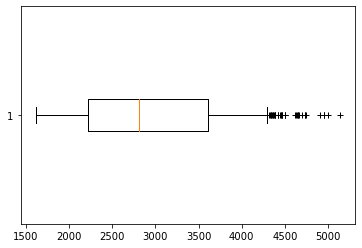

In [32]:
#plotting outliers for "weight" feature using boxplot of matplotlib
plt.boxplot(df["weight"], notch =False, sym = '+', vert=False, whis=0.5,
          positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x26f6a775370>,
 'caps': [<matplotlib.lines.Line2D at 0x26f6a775a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f6a768f70>],
 'medians': [<matplotlib.lines.Line2D at 0x26f6a7821f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f6a782580>],
 'means': []}

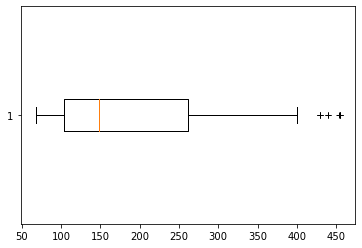

In [33]:
#plotting outliers for "displacement" feature
plt.boxplot(df["displacement"], notch =False, sym = '+', vert=False, whis=1,
          positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x26f6a7d2f10>,
 'caps': [<matplotlib.lines.Line2D at 0x26f6a7e1670>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f6a7d2b80>],
 'medians': [<matplotlib.lines.Line2D at 0x26f6a7e1d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f6a7ec160>],
 'means': []}

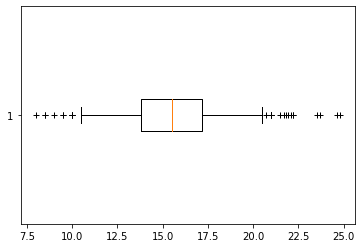

In [34]:
#plotting outliers for "acceleration" feature
plt.boxplot(df["acceleration"], notch =False, sym = '+', vert=False, whis=1,
          positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x26f6a845580>,
 'caps': [<matplotlib.lines.Line2D at 0x26f6a845ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f6a8451f0>],
 'medians': [<matplotlib.lines.Line2D at 0x26f6a84f400>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f6a84f790>],
 'means': []}

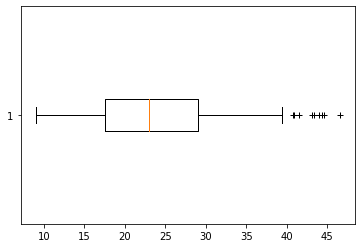

In [35]:
#plotting outliers for "mpg" feature
plt.boxplot(df["mpg"], notch =False, sym = '+', vert=False, whis=1,
          positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)

### Removing Outliers from the dataset



In [36]:
#adding new feature columns without outliers to the dataset, using z-score formula for computations
df['zscore_weight'] = (df.weight - df.weight.mean() ) / df.weight.std()

In [37]:
df['zscore_mpg'] = (df.mpg - df.mpg.mean() ) / df.mpg.std()

In [38]:
df['zscore_acceleration'] = ( df.acceleration - df.acceleration.mean() ) / df.acceleration.std()

In [39]:
df['zscore_displacement'] = ( df.displacement - df.displacement.mean() ) / df.displacement.std()

https://statisticsbyjim.com/basics/outliers/

In [40]:
#reintroducing dataset including only features within two standard deviation
#removed "displacemnet" feature's outliers
df[df['zscore_displacement']>-2 | (df['zscore_displacement']<2)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,zscore_weight,zscore_mpg,zscore_acceleration,zscore_displacement
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.630077,-0.705551,-1.293870,1.089233
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.853259,-1.089379,-1.475181,1.501624
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.549778,-0.705551,-1.656492,1.194728
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.546236,-0.961437,-1.293870,1.060461
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.565130,-0.833494,-1.837804,1.041280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw),1.640891,-0.846288,-0.242265,1.501624
290,15.5,8,351.0,142,4054,14.3,79,1,ford country squire (sw),1.279549,-1.025408,-0.459838,1.511215
292,18.5,8,360.0,150,3940,13.0,79,1,chrysler lebaron town @ country (sw),1.144931,-0.641579,-0.931247,1.597529
298,23.0,8,350.0,125,3900,17.4,79,1,cadillac eldorado,1.097697,-0.065836,0.664292,1.501624


In [41]:
#removed "acceleration" feature's outliers
df[df['zscore_acceleration']>-2 | (df['zscore_acceleration']<2)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,zscore_weight,zscore_mpg,zscore_acceleration,zscore_displacement
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,-1.340775,0.317993,1.788421,-0.924773
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d,2.080171,-1.857037,1.063176,1.060461
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,-1.091614,0.190050,1.244488,-0.915182
46,22.0,4,140.0,72,2408,19.0,71,1,chevrolet vega (sw),-0.664144,-0.193779,1.244488,-0.512381
51,30.0,4,79.0,70,2074,19.5,71,2,peugeot 304,-1.058550,0.829765,1.425799,-1.097402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,27.0,4,112.0,88,2640,18.6,82,1,chevrolet cavalier wagon,-0.390185,0.445936,1.099439,-0.780915
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,0.076254,-0.065836,1.788421,-0.406885
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,-0.992422,2.620966,3.275173,-0.924773
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,-0.407897,0.573879,1.099439,-0.704191


In [42]:
#removed "mpg" feature's outliers
df[df['zscore_mpg']<-2 | (df['zscore_mpg']>2)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,zscore_weight,zscore_mpg,zscore_acceleration,zscore_displacement
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.630077,-0.705551,-1.293870,1.089233
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.853259,-1.089379,-1.475181,1.501624
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.549778,-0.705551,-1.656492,1.194728
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.546236,-0.961437,-1.293870,1.060461
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.565130,-0.833494,-1.837804,1.041280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l,-0.159917,-0.193779,-0.314789,0.369945
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro,-0.024119,0.445936,0.628029,-0.406885
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,-0.213056,0.445936,0.011571,-0.512381
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,-0.407897,0.573879,1.099439,-0.704191


In [43]:
#removed "weight" feature's outliers
df[df['zscore_weight']>-2 | (df['zscore_weight']<2)]
#df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,zscore_weight,zscore_mpg,zscore_acceleration,zscore_displacement
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,1.618455,-1.089379,-2.019115,2.259274
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,1.633806,-1.217322,-2.381737,2.499036
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,1.584210,-1.217322,-2.563048,2.364769
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,1.717647,-1.217322,-2.019115,2.508627
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,1.038654,-1.089379,-2.563048,1.885244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,18.2,8,318.0,135,3830,15.2,79,1,dodge st. regis,1.015037,-0.679962,-0.133478,1.194728
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw),1.640891,-0.846288,-0.242265,1.501624
290,15.5,8,351.0,142,4054,14.3,79,1,ford country squire (sw),1.279549,-1.025408,-0.459838,1.511215
292,18.5,8,360.0,150,3940,13.0,79,1,chrysler lebaron town @ country (sw),1.144931,-0.641579,-0.931247,1.597529


[Back to top](#Content:)


<a id='part8'></a>

# Part 8 -  Conclusion :

The regression slopes may or may not change strongly, it depends on the positions of the outliers, if 2 outliers are symetric with respect to the regression line then their effect on the slope cancels out.

Adding outliers always affect the regression score and make it smaller